# Qiskit Primitives in Simulator

Qiskit primtives also does the job of a simulator except they give more options than a simulator.We can give paramters also in the input and it will run the ciruit with the parameters we provided.

Qiskit primitives are of two types V1-Primitives and V2-Primtives.This code uses V2 primitives.
V1-primitives are Estimator and Sampler 
V2-Primitives can be used to in your computer(Statevector Sampler) or in QPU OF IBM using Qiskit IBM Runtime(SamplerV2,EstimatorV2)


In [27]:
from qiskit import QuantumCircuit
from qiskit.primitives import StatevectorSampler, StatevectorEstimator
from qiskit.circuit import parameter
from qiskit.visualization import plot_histogram
from qiskit.circuit.library import TwoLocal
import numpy as np
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp

# Qiskit sampler 

The input to sampler must be given in the form of Pubs (Primitive unified bloc) which is a list containing our quantum circuit,our parameter values and no of shots.It helps us to measure our circuits and return the measurement results 

i. Circuits without Parameter

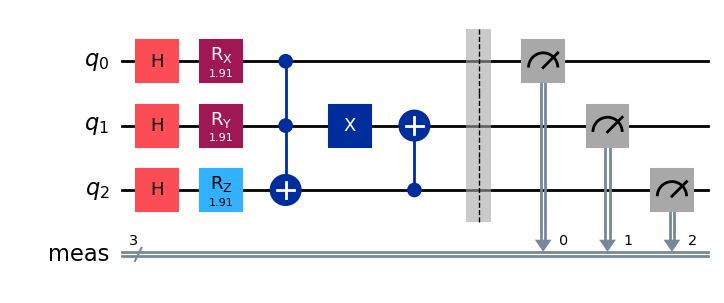

In [12]:
qc=QuantumCircuit(3)
qc.h(0)
qc.h(1)
qc.h(2)
qc.rx(1.91063324, 0)
qc.ry(1.91063324, 1)
qc.rz(1.91063324, 2)
qc.ccx(0,1,2)
qc.x(1)
qc.cx(2,1)
qc.measure_all()
qc.draw("mpl")

{'110': 269, '001': 250, '000': 230, '111': 236, '101': 10, '010': 11, '011': 10, '100': 8}


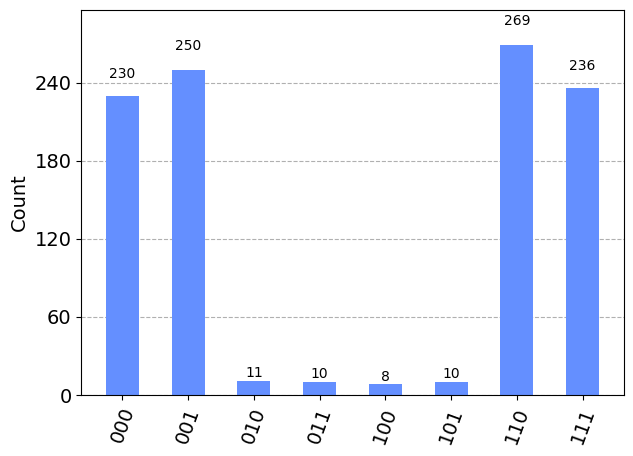

In [17]:
sampler = StatevectorSampler()
pub = (qc) #Defining our PUB with quantum circuit,parameters(if present in circuit)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

ii. Circuits with parameters (Parameterized circuits)

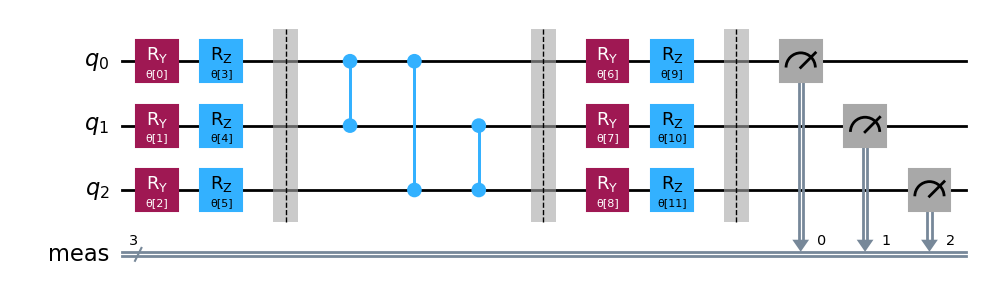

In [20]:
num_qubits = 3
rotation_blocks = ['ry','rz'] 
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(3, rotation_blocks,entanglement_blocks ,entanglement, reps=1, insert_barriers=True)
ansatz.measure_all()


ansatz.decompose().draw('mpl')

{'000': 129, '011': 129, '101': 238, '001': 141, '100': 249, '010': 138}


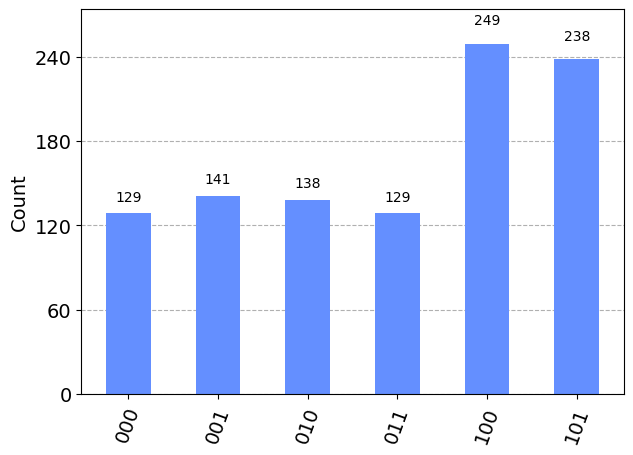

In [24]:
sampler = StatevectorSampler()
c=np.pi
params=[]
for i in range(12):
    n=i*c/4
    params.append(n)

pub = (ansatz,params) #Defining our PUB with quantum circuit,parameters(if present in circuit)
job_sampler = sampler.run([pub], shots=1024)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)
plot_histogram(counts_sampler)

# Qiskit Estimator

Estimator is used to evaluate the expectation value of an operator with a given vector we define.For this we have to pass the vector,Parameters as well as the operator as input

Defining our Hamiltonian to which we are going to find expectation

In [29]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ'])
print(pauli_op.to_matrix())

estimator=StatevectorEstimator()

[[ 3.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -3.+0.j]]


Defining our intial state with parameters

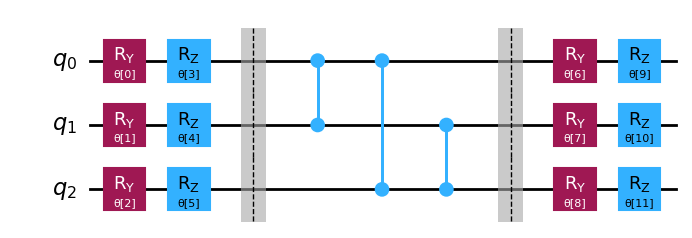

In [32]:
num_qubits = 3
rotation_blocks = ['ry','rz'] 
entanglement_blocks = 'cz'
entanglement = 'full'

ansatz = TwoLocal(3, rotation_blocks,entanglement_blocks ,entanglement, reps=1, insert_barriers=True)



ansatz.decompose().draw('mpl')

In [33]:
params=[]
for i in range(12):
    n=i*c/4
    params.append(n)

In [34]:
pub =  (ansatz, [pauli_op], [params])
result = estimator.run(pubs=[pub]).result()
expectation = result[0].data.evs[0]
print("The expectation value is",expectation)

The expectation value is 0.4999999999999998
